# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [3]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [4]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return x**2 * numpy.sin(x)

Ensure your function works with numpy arrays:

In [5]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [6]:
def g(x):
    '''Analytical integral of f(x).'''
    return 2*x*numpy.sin(x) - (x**2 - 2) * numpy.cos(x) - 2

Check your solution with the same numpy array:

In [7]:
assert g(0) == 0.

In [8]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [10]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax) - g(xmin)

Check your analytic function:

In [11]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [19]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    coefficients = [2, 4]
    delta_x = (xmax - xmin)/N
    
    x = lambda i:xmin + i*delta_x
    
    if N > 1:
        integral = delta_x/3 * (f(xmin) + f(xmax) + sum([coefficients[i%2] * f(x(i)) for i in range(1, N)]))
    
    else:
        integral = delta_x/6 * (f(xmin) + 4*f((xmin+xmax)/2)+f(xmax))
    
    return integral

# Code golf bonus
#integrate_numeric = lambda xmin,xmax,N:[(xmax-xmin)/N/6*(f(xmin)+4*f((xmin+xmax)/2)+f(xmax)),(xmax-xmin)/N/3*(f(xmin)+f(xmax)+sum([[2,4][i%2]*f(xmin+i*(xmax-xmin)/N)for i in range(1,N)]))][N>1]

Make sure you have implemented Simpson's rule correctly:

In [13]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [14]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,"Fractional error of Simpson's Rule against panel count")

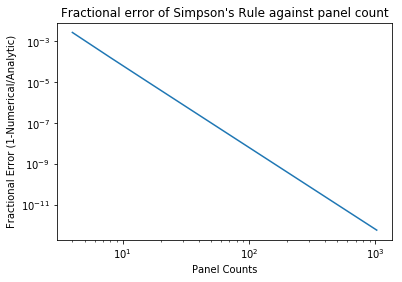

In [18]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
result_numerical = numpy.array([integrate_numeric(x0, x1, N) for N in panel_counts])

plt.loglog(numpy.array(panel_counts), 1-result_numerical/result_analytic)
plt.xlabel("Panel Counts")
plt.ylabel("Fractional Error (1-Numerical/Analytic)")

plt.title("Fractional error of Simpson's Rule against panel count")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As the number of panels increases, the accuracy of the method increases as it more closely approximates the function. However, if the panels gets too large, $\Delta x$ gets too small and the floating point integer representation starts to loose accuracy.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

If the trapezium rule was being used, the accuracy would increase more slowly with panel count than with Simpson's Rule and would not reach the floating point accuracy limit as quickly.